# Neural Networks
### By: Kolton Cox


## Neural Networks in Machine Learning 
Neural networks is a branch of machine-learning that is inspired by the neurons in the brain. Mark Stadtmueller, VP of product strategy at AI platform provider Lucd said, “A brain neuron receives an input and based on that input, fires off an output that is used by another neuron. The neural network simulates this behavior in learning about collected data and then predicting outcomes,”.

Two main characteristics of a neural network:

- Architecture
- Learning

#### Architecture

- It tells about the connection type: whether it is feedforward, recurrent, multi-layered, convolutional, or single layered. It also tells about the number of layers and the number of neurons in every layer.

#### Learning

- It tells about the method in which the neural network is trained. A common way to train a neural network is to use gradient descent and backpropagation.

#### Building Steps for the Neural Network
For our purposes, we will build a multilayered perceptron with $L$ layers.

For $l = 2, \dots, L$, each layer $l$ in our network will have two phases, the preactivation phase$$z^l = W^la^{l-1} + b^l,$$and postactivation phase$$a^l = \sigma(z^l).$$The preactivation phase consists of a weighted linear combination of postactivation values in the previous layer. The postactivation values consists of passing the preactivation value through an activation function elementwise. Note $a^1 = x$, where $x$ is the current input data into our network. For our activation function, we will use the sigmoid function:

Sigmoid Function$$
\sigma(s) = \frac{1}{1+e^{-s}}.
$$
For our cost function, we will use the Mean Sqaure Error cost:$$
C = C(W, b) = \frac{1}{2}\sum_{i=1}^n||a^i - y^i||^2.
$$

## MNIST Data Set
- The MNIST data set consists of 70,000 images of hand written digits, 60,000 of which are typically used as labeled training examples, where the other 10,000 are used for testing your learing model on. The following picture represents a sample of some of the images. 
- To access this data set, as well as view the data s an image, we need the following packages:
  + MNIST [documentation](http://yann.lecun.com/exdb/mnist/)
  + MLDatasets [documentation](https://juliaml.github.io/MLDatasets.jl/latest/)
  + Images [documentation](https://github.com/JuliaImages/juliaimages.github.io)
  + TestImages [documentation](https://testimages.juliaimages.org/)
  + ImageMagicIO [documentation](https://juliapackages.com/p/imagemagick)
  
![](https://raw.githubusercontent.com/RandyRDavila/Teaching/6a86485c40b053f0feca82e32ae1fcaa1481ea26/UHD_DATA/DATA_4319/Supervised_Learning/Neural_Network/MnistExamples.png)
____

In [23]:
using MLDatasets
using Images
using TestImages
using Plots

train_x, train_y = MNIST.traindata()
test_x, test_y = MNIST.testdata();

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278


___
The data structures train_x and test_x are stored as 3 dimensional tensors. 
___

In [66]:
size(train_x)

(28, 28, 60000)

___
Each image in the image is comprised of a 28 x 28 grey scaled grid of pixel values. These values are floating point numbers in the interval(0,1), where darker pixels will have values closer to 1 and lighter pixels will have values closer to 0. the following image represents one such example.
___

In [67]:
train_x[:, :, 1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

The first image in our train data is labeled 5


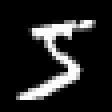

In [68]:
println("The first image in our train data is labeled ", train_y[1])
colorview(Gray, train_x[:, :, 1]')

____
Each training image is a 28x28 matrix. In order to pass these images into our neural network we will need to flatten the training instances (matrices) into a set of vectors. This can be done with the following code.
____

In [69]:
reshape(train_x[:, :, 1], 784)

784-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8

In [70]:
# Train Data
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:, :, i], 784))
    y = zeros(10)
    y[train_y[i] + 1] = 1.0
    push!(Y, y)
end
train_data = [x for x in zip(X, Y)]

# Test Data
X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:, :, i], 784))
    y = zeros(10)
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end
test_data = [x for x in zip(X, Y)];

In [71]:
# Define the activation function and its derivative
σ(x) = 1.0/(1.0 + exp(-x))

dσ(x) = σ(x)*(1-σ(x))

# Define a neural network type
mutable struct neural_network
    W
    b
end


function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    
    W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)]
    
    b = [[0.0], randn(hidden_layer_sizes[1])]
    
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
        push!(b, randn(hidden_layer_sizes[i]))
    end
    
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
    
    return neural_network(W, b)
end

create_network (generic function with 1 method)

In [72]:
NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64,N} where N[[0.0], [-0.42157263373253884 0.3403603929875391 … 0.7059593979544831 0.20027866838686909; -0.5511582050303858 -0.6202309730824873 … 1.1173789604463185 0.8469990700742954; … ; -1.2674191289822463 -0.352451532255533 … -0.25369784434266657 0.9237549894255448; 0.5888241528827143 -0.6671474057077613 … -0.010898713052919846 1.3197409851870658], [0.8397164914381363 0.06281299272341709 … 0.20024784159505282 -1.5823814028819243; 0.17787394387725067 1.0472227870363326 … -0.5207907779785867 -0.4746814500619013; … ; 1.416902595526563 0.807407900114016 … -0.6877930032581488 -0.08114396872700133; -0.4189263012382215 -0.22948097477918517 … 0.19925301828344527 0.719441135225275], [-1.398287473240797 2.92465412620271 … -0.9002921970459473 -0.2728782607109108; -0.9302691329535332 0.31258103048954944 … 0.2765191153840039 0.8920706970356788; … ; -0.5061578840948949 1.0795188227173116 … 1.9463871854577042 -0.5814913765779086; 0.5550701595304238 0.8229256331507262 … 0

In [73]:
# Wieghts
NN.W

5-element Array{Array{Float64,N} where N,1}:
 [0.0]
 [-0.42157263373253884 0.3403603929875391 … 0.7059593979544831 0.20027866838686909; -0.5511582050303858 -0.6202309730824873 … 1.1173789604463185 0.8469990700742954; … ; -1.2674191289822463 -0.352451532255533 … -0.25369784434266657 0.9237549894255448; 0.5888241528827143 -0.6671474057077613 … -0.010898713052919846 1.3197409851870658]
 [0.8397164914381363 0.06281299272341709 … 0.20024784159505282 -1.5823814028819243; 0.17787394387725067 1.0472227870363326 … -0.5207907779785867 -0.4746814500619013; … ; 1.416902595526563 0.807407900114016 … -0.6877930032581488 -0.08114396872700133; -0.4189263012382215 -0.22948097477918517 … 0.19925301828344527 0.719441135225275]
 [-1.398287473240797 2.92465412620271 … -0.9002921970459473 -0.2728782607109108; -0.9302691329535332 0.31258103048954944 … 0.2765191153840039 0.8920706970356788; … ; -0.5061578840948949 1.0795188227173116 … 1.9463871854577042 -0.5814913765779086; 0.5550701595304238 0.82292563315072

In [74]:
# Biases
NN.b

5-element Array{Array{Float64,1},1}:
 [0.0]
 [0.10275536721573753, 0.007243036350538597, 0.9441496753644434, -0.020531630096775742, -0.2458616145092062, -1.273446645922761, -0.3276151701928913, -0.6695476941059716, 0.4665268009843088, 1.6718325124683528  …  0.164690876749953, 0.7978162570548456, 0.15033076907162551, -0.04534970479971665, 2.008924749950115, 0.6539005111276739, 0.9204727989025456, 0.4939202422286082, 0.22041934059748014, 2.4725046120429073]
 [0.7735034120902646, 2.1490270454889084, 0.555544472489522, -0.820121319943974, 0.38309703494700004, -1.546855963644109, -0.6646626672102393, -0.9536179181598912, 0.04578589141313067, 0.4136712711944022  …  -1.62988773454655, 0.04214164184940698, 0.2817405025640712, 0.11741329715631275, -0.403308719563674, -0.6133131167655759, -2.03613847639237, -1.557068522364547, 0.07496416402747061, 1.5256148597428278]
 [-1.6596112165035948, -0.5770173413904869, -1.0021699812248945, 0.47504031914672357, -0.12443633444359979, 0.24441097660736774, 0

In [75]:
# defining the dimensions of the network
for w in NN.W
    println(size(w))
    println("")
end

(1,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



In [76]:
function forward_pass(network, training_instance)
    Z = [[0.0]]
    A = [training_instance[1]]
    
    for i = 2:length(network.W)
        push!(Z, network.W[i]*A[i-1] + network.b[i])
        push!(A, σ.(Z[i]))
    end
    
    return Z, A
end

function predict(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    return argmax(A[end]) - 1
end

function success_percentage(network, data_set)
    return string("The percentage of correctly classified images is: ", sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)*100.," %")
end 

success_percentage (generic function with 1 method)

In [77]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 11.07 %"

In [78]:
function error_deltas(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    L = size(network.W)[1]
    δ = [(A[end] - training_instance[2]).*dσ.(Z[end])]
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end
    pushfirst!(δ, [0.0])
    return A, δ
end;

In [79]:
A_test, δ_test = error_deltas(NN, train_data[1]);

In [80]:
δ_test[end]

10-element Array{Float64,1}:
  0.1415273836073831
  0.011695219604108104
  0.00024630372747281226
  1.1735711564211111e-5
  1.2522332755040525e-6
 -4.2823753350761954e-5
  0.05883450595563337
  0.0007228692404233542
  0.0
  0.011595527162725088

In [81]:
function make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:size(data_set)[1] - mini_batch_size)
    return data_set[k:k + mini_batch_size]
end

function mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)
    
    mini_batch = make_random_mini_batch(mini_batch_size, data_set)
    L = size(network.W)[1]
    
    A, δ = error_deltas(network, mini_batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(network, mini_batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -= (α/mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/mini_batch_size)*sum([δ_batch[i][l] for i = 1:mini_batch_size])
    end
end;   

In [82]:
for i = 1:60000
    mini_batch_update!(NN, 2, train_data, 0.4)
    if i % 5000 == 0
        println("Epochs ",i)
        println("The percentage of correct classified images is:",success_percentage(NN, test_data),"\n")       
    end
end

Epochs 5000
The percentage of correct classified images is:The percentage of correctly classified images is: 10.71 %

Epochs 10000
The percentage of correct classified images is:The percentage of correctly classified images is: 79.10000000000001 %

Epochs 15000
The percentage of correct classified images is:The percentage of correctly classified images is: 88.12 %

Epochs 20000
The percentage of correct classified images is:The percentage of correctly classified images is: 89.25 %

Epochs 25000
The percentage of correct classified images is:The percentage of correctly classified images is: 89.9 %

Epochs 30000
The percentage of correct classified images is:The percentage of correctly classified images is: 91.03 %

Epochs 35000
The percentage of correct classified images is:The percentage of correctly classified images is: 90.88000000000001 %

Epochs 40000
The percentage of correct classified images is:The percentage of correctly classified images is: 92.28 %

Epochs 45000
The percentag

In [83]:
success_percentage(NN, test_data)

"The percentage of correctly classified images is: 93.69 %"

## Final Thoughts:

- What we can see above is that the program is working nicely. 
- We can see that increasing batch size as well as decreasing learning rate has potential to increases accuracy in prediction of the model. 

In [84]:
function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

function show_test_example(network::neural_network, i::Int64, testing_data)
    println("Predicted label: ", predict(network, testing_data[i]))
    println("Actual label: ", argmax(testing_data[i][2])-1)
    show_test_img(i)
end

show_test_example (generic function with 1 method)

Predicted label: 5
Actual label: 5


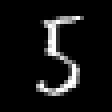

In [85]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)